In [1]:
import numpy as np
import cv2 as cv
img1 = cv.imread('img1.jpg')
img2 = cv.imread('img2.jpg')
img3 = cv.imread('img3.jpg')
img1_gray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
img2_gray = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
img3_gray = cv.cvtColor(img3, cv.COLOR_BGR2GRAY)

In [14]:
hist1_gray = cv.calcHist([img1_gray],[0],None,[256],[0,256])
hist2_gray = cv.calcHist([img2_gray],[0],None,[256],[0,256])
hist3_gray = cv.calcHist([img3_gray],[0],None,[256],[0,256])

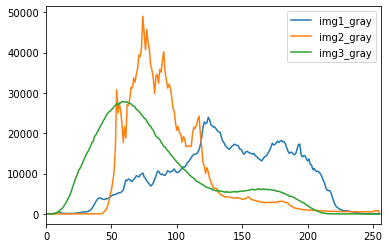

In [15]:
from matplotlib import pyplot as plt
plt.plot(hist1_gray, label = 'img1_gray')
plt.plot(hist2_gray, label = 'img2_gray')
plt.plot(hist3_gray, label = 'img3_gray')
plt.legend(loc="upper right")
plt.xlim([0,256])
plt.show()

In [9]:
cv.compareHist(hist1_gray, hist2_gray, method=cv.HISTCMP_CHISQR)#one and two
cv.compareHist(hist1_gray, hist3_gray, method=cv.HISTCMP_CHISQR)#one and three
cv.compareHist(hist3_gray, hist2_gray, method=cv.HISTCMP_CHISQR)#three and two

1.1420578043973744

In [16]:
def norml(h):    
    s = sum(h)
    for i in range(256):
        h[i] = h[i]/s
    return h
hist1 = norml(hist1_gray)
hist2 = norml(hist2_gray)
hist3 = norml(hist3_gray)

In [17]:
import math
def get_kl_divergence(histogram_one, histogram_two):
    number_of_bins = len(histogram_one)
    kl_divergence = 0
    for i in range(0, number_of_bins):
        histogram_one[i] += 0.000001
        histogram_two[i] += 0.000001       
        kl_divergence += histogram_one[i] * math.log2(histogram_one[i] / histogram_two[i])
       
    return kl_divergence
        
get_kl_divergence(hist1, hist2)+get_kl_divergence(hist2, hist1)

array([2.4971914], dtype=float32)

In [18]:
get_kl_divergence(hist1, hist3)+get_kl_divergence(hist3, hist1)#one and three

array([2.3908107], dtype=float32)

In [19]:
get_kl_divergence(hist2, hist3)+get_kl_divergence(hist3, hist2)#two and three

array([2.433927], dtype=float32)